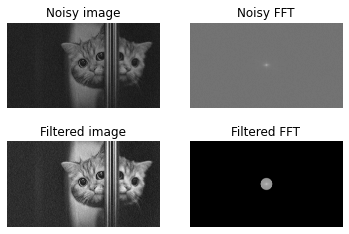

In [1]:
# Task 7 
# Fast Fourier transform algorithm for image denoising and filtering. 
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
A = imread(os.path.join('Cotik.jpg'))
B = np.mean(A, -1)  # Convert RGB to grayscale

Bnoise = B + 220*np.random.randn(*B.shape).astype('uint8') # Add some noise
Bt = np.fft.fft2(Bnoise)
Btshift = np.fft.fftshift(Bt)
F = np.log(np.abs(Btshift)+1) # Put FFT on log scale

fig,axs = plt.subplots(2,2)

axs[0,0].imshow(Bnoise, cmap='gray')
axs[0,0].title.set_text('Noisy image')
axs[0,0].axis('off')

axs[0,1].imshow(F, cmap='gray')
axs[0,1].title.set_text('Noisy FFT')
axs[0,1].axis('off')

nx,ny = B.shape
X,Y = np.meshgrid(np.arange(-ny/2+1,ny/2+1),np.arange(-nx/2+1,nx/2+1))
R2 = np.power(X,2) + np.power(Y,2)
ind = R2 < 150**2
Btshiftfilt = Btshift * ind
Ffilt = np.log(np.abs(Btshiftfilt)+1) # Put FFT on log scale

axs[1,1].imshow(Ffilt, cmap='gray')
axs[1,1].title.set_text('Filtered FFT')
axs[1,1].axis('off')

Btfilt = np.fft.ifftshift(Btshiftfilt)
Bfilt = np.fft.ifft2(Btfilt).real
axs[1,0].imshow(Bfilt, cmap='gray')
axs[1,0].title.set_text('Filtered image')
axs[1,0].axis('off')

plt.show()